[View in Colaboratory](https://colab.research.google.com/github/karawalla/deeplearning/blob/master/AgeDetectorTest.ipynb)

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
file_list = drive.ListFile({'q': "'1V9nsFotw_gaHCiz_AY-UZZ9TaAMiKnIe' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

train_downloaded = drive.CreateFile({'id': '18XsB6rxQDhRlKPObe356QAFN_CyBAjHR'})
train_downloaded.GetContentFile('train.zip')
test_downloaded = drive.CreateFile({'id': '168487PQj2N7mEP_pZb5JjVFzmRK0TUO-'})
test_downloaded.GetContentFile('test.zip')  

title: AgeDetector.ipynb, id: 1r19OHImli8qe2fQeeXP_7lRoO1qvbf9M
title: Untitled0.ipynb, id: 1djHBaBCRtfRxfcAFZXEXBxE87xOuXTzP
title: train_DETg9GD.zip, id: 18XsB6rxQDhRlKPObe356QAFN_CyBAjHR
title: test_Bh8pGW3.zip, id: 168487PQj2N7mEP_pZb5JjVFzmRK0TUO-


In [11]:
!ls

datalab  Test  test.csv  test.zip  Train  train.csv  train.zip


In [14]:
% pylab inline
import os
import random

import pandas as pd
from scipy.misc import imread

Populating the interactive namespace from numpy and matplotlib


In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


Age: MIDDLE


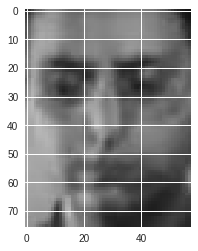

In [48]:
i = random.choice(train.index)
img_name = train.ID[i]
img =imread(os.path.join('Train', img_name))

print("Age:", train.Class[i])
imshow(img)

In [54]:
from scipy.misc import imresize

tmp = []
for img_name in train.ID:
  img = imread(os.path.join('Train', train.ID[i]))
  img = imresize(img, (32, 32))
  img = img.astype('float32')
  tmp.append(img)

train_x = np.stack(tmp)


tmp = []
for img_name in test.ID:
  img = imread(os.path.join('Test', test.ID[i]))
  img = imresize(img, (32, 32))
  img = img.astype('float32')
  tmp.append(img)

test_x = np.stack(tmp)



  

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [0]:
test_x = test_x/255.
train_x = train_x/255.

In [60]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [62]:
test

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg
5,19851.jpg
6,10384.jpg
7,24567.jpg
8,2029.jpg
9,4956.jpg
